Marketing Email Optimization using Machine Learning

This project aims to optimize marketing emails to target the customer audience that purchases a class upgrade after receiving a marketing email. The project will involve analyzing a dataset obtained from a class upgrade campaign for a single company, collected from 3rdPlace Datrix's AI Models Company, which published the case study for DEM optimization with a Random Forest based approach. The dataset contains information about customer demographics, email interaction, and user activity on the company's website.

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

In [2]:
#import the data using pandas into data frame
df = pd.read_csv('direct_email_marketing_database.csv')
df.head()

upgrade_price        age  n_purchase  discount_purchase  n_reward  \
0              8  54.235729          14                 14         0   
1              8  54.235729          14                  0         0   
2              8  37.901482           3                  3         0   
3              8  37.901482           3                  0         0   
4              8  64.794633           4                  1         0   

   n_first_class  n_second_class  n_third_class  n_fourth_class  \
0              0              11              3               0   
1              0               0              0               0   
2              0               3              0               0   
3              0               0              0               0   
4              0               2              0               0   

   avg_npassengers  ...  n_hits  total_session_duration  total_revenue  \
0              1.0  ...     705                 1681048    771700000.0   
1              1.0  ...     788                 1704103    771700000.0   
2              1.0  ...       0                       0            0.0   
3              1.0  ...       0                       0            0.0   
4              1.0  ...     466                  163290    123200000.0   

   conversions  n_search  n_path   avg_hits  avg_session_duration  \
0           19        13       3  47.000000         112069.866700   
1           19        21       3  35.818182          77459.227270   
2            0         0       0        NaN                   NaN   
3            0         0       0        NaN                   NaN   
4            2         0       0   7.060606           2474.090909   

    avg_revenue  success  
0  5.144667e+07    False  
1  3.507727e+07    False  
2           NaN    False  
3           NaN    False  
4  1.866667e+06    False  

[5 rows x 46 columns]

In [3]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T.round()

count         mean           std    min        25%  \
upgrade_price          16383.00         8.00          1.00   4.00       8.00   
age                    16383.00        40.00         15.00  18.00      28.00   
n_purchase             16383.00        12.00         16.00   1.00       4.00   
discount_purchase      16383.00         2.00          3.00   0.00       1.00   
n_reward               16383.00         0.00          1.00   0.00       0.00   
n_first_class          16383.00         1.00          1.00   0.00       0.00   
n_second_class         16383.00         4.00          4.00   0.00       1.00   
n_third_class          16383.00         0.00          1.00   0.00       0.00   
n_fourth_class         16383.00         0.00          0.00   0.00       0.00   
avg_npassengers        16383.00         2.00          1.00   1.00       1.00   
avg_price              16383.00        34.00         12.00   7.00      26.00   
sdt_dev_price          16049.00        11.00          8.00   0.00       5.00   
avg_distance           16383.00       525.00        135.00 149.00     464.00   
sdt_dev_distance       16049.00        48.00         74.00   0.00       0.00   
since_last_purchase    16383.00        25.00         19.00   0.00      11.00   
n_sent_reminder        16383.00         0.00          1.00   0.00       0.00   
n_open_reminder        16383.00         0.00          0.00   0.00       0.00   
avg_opens_reminder     16383.00         0.00          1.00   0.00       0.00   
n_click_reminder       16383.00         0.00          0.00   0.00       0.00   
avg_clicks_reminder    16383.00         0.00          0.00   0.00       0.00   
n_sent_upgrade         16383.00         0.00          1.00   0.00       0.00   
n_open_upgrade         16383.00         0.00          1.00   0.00       0.00   
avg_opens_upgrade      16383.00         0.00          1.00   0.00       0.00   
n_click_upgrade        16383.00         0.00          0.00   0.00       0.00   
avg_clicks_upgrade     16383.00         0.00          0.00   0.00       0.00   
n_sent_discount        16383.00         3.00          3.00   0.00       0.00   
n_open_discount        16383.00         2.00          2.00   0.00       0.00   
avg_opens_discount     16383.00         1.00          2.00   0.00       0.00   
n_click_discount       16383.00         0.00          1.00   0.00       0.00   
avg_clicks_discount    16383.00         0.00          1.00   0.00       0.00   
price                  16383.00        31.00         14.00   0.00      23.00   
days_2_trip            16383.00         3.00          0.00   1.00       3.00   
distance               16383.00       547.00        134.00 112.00     478.00   
n_sessions             16383.00        36.00         87.00   0.00       2.00   
n_bounces              16383.00         8.00         27.00   0.00       0.00   
n_hits                 16383.00       695.00       1446.00   0.00      45.00   
total_session_duration 16383.00   1518389.00    7556571.00   0.00   13772.00   
total_revenue          16383.00 736199402.00 4679832628.00   0.00       0.00   
conversions            16383.00         8.00         18.00   0.00       0.00   
n_search               16383.00        12.00         20.00   0.00       0.00   
n_path                 16383.00         3.00          4.00   0.00       0.00   
avg_hits               13138.00        30.00         29.00   1.00      14.00   
avg_session_duration   13138.00    102786.00     838973.00   0.00    8971.00   
avg_revenue            13138.00  27490010.00   38471534.00   0.00 4609091.00   

                                50%          75%             max  
upgrade_price                  8.00         8.00            8.00  
age                           38.00        52.00          120.00  
n_purchase                     8.00        14.00          326.00  
discount_purchase              1.00         3.00           43.00  
n_reward                       0.00         0.00            9.00  
n_first_class          

Checking for null values

In [4]:
print(df.isnull().sum())

upgrade_price                0
age                          0
n_purchase                   0
discount_purchase            0
n_reward                     0
n_first_class                0
n_second_class               0
n_third_class                0
n_fourth_class               0
avg_npassengers              0
avg_price                    0
sdt_dev_price              334
avg_distance                 0
sdt_dev_distance           334
since_last_purchase          0
n_sent_reminder              0
n_open_reminder              0
avg_opens_reminder           0
n_click_reminder             0
avg_clicks_reminder          0
n_sent_upgrade               0
n_open_upgrade               0
avg_opens_upgrade            0
n_click_upgrade              0
avg_clicks_upgrade           0
n_sent_discount              0
n_open_discount              0
avg_opens_discount           0
n_click_discount             0
avg_clicks_discount          0
price                        0
days_2_trip                  0
is_secon

Checking for the variables data type, hence to convert as per the requirement

In [5]:
print(df.dtypes)

upgrade_price               int64
age                       float64
n_purchase                  int64
discount_purchase           int64
n_reward                    int64
n_first_class               int64
n_second_class              int64
n_third_class               int64
n_fourth_class              int64
avg_npassengers           float64
avg_price                 float64
sdt_dev_price             float64
avg_distance              float64
sdt_dev_distance          float64
since_last_purchase       float64
n_sent_reminder             int64
n_open_reminder             int64
avg_opens_reminder        float64
n_click_reminder            int64
avg_clicks_reminder       float64
n_sent_upgrade              int64
n_open_upgrade              int64
avg_opens_upgrade         float64
n_click_upgrade             int64
avg_clicks_upgrade        float64
n_sent_discount             int64
n_open_discount             int64
avg_opens_discount        float64
n_click_discount            int64
avg_clicks_dis

In [6]:
# check for NaN values in the dataframe
print(df.isna().any())

upgrade_price             False
age                       False
n_purchase                False
discount_purchase         False
n_reward                  False
n_first_class             False
n_second_class            False
n_third_class             False
n_fourth_class            False
avg_npassengers           False
avg_price                 False
sdt_dev_price              True
avg_distance              False
sdt_dev_distance           True
since_last_purchase       False
n_sent_reminder           False
n_open_reminder           False
avg_opens_reminder        False
n_click_reminder          False
avg_clicks_reminder       False
n_sent_upgrade            False
n_open_upgrade            False
avg_opens_upgrade         False
n_click_upgrade           False
avg_clicks_upgrade        False
n_sent_discount           False
n_open_discount           False
avg_opens_discount        False
n_click_discount          False
avg_clicks_discount       False
price                     False
days_2_t

In [7]:
# Calculate the percentage of NaN values in avg_hits
nan_percentage_avg_hits = df['avg_hits'].isna().sum() / len(df['avg_hits']) * 100

# Print the result
print(f"The percentage of NaN values in the '{'avg_hits'}' column is: {nan_percentage_avg_hits:.2f}%")
# Calculate the percentage of NaN values in avg_session_duration
nan_percentage_avg_session_duration = df['avg_session_duration'].isna().sum() / len(df['avg_session_duration']) * 100
# Print the result
print(f"The percentage of NaN values in the '{'avg_session_duration'}' column is: {nan_percentage_avg_session_duration:.2f}%")
# Calculate the percentage of NaN values in avg_revenue
nan_percentage_avg_revenue= df['avg_revenue'].isna().sum() / len(df['avg_revenue']) * 100
# Print the result
print(f"The percentage of NaN values in the '{'avg_revenue'}' column is: {nan_percentage_avg_revenue:.2f}%")

The percentage of NaN values in the 'avg_hits' column is: 19.81%
The percentage of NaN values in the 'avg_session_duration' column is: 19.81%
The percentage of NaN values in the 'avg_revenue' column is: 19.81%


Imputing the mean value with missing values

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
# check for infinite values in the dataframe
print(np.isinf(df).any())

upgrade_price             False
age                       False
n_purchase                False
discount_purchase         False
n_reward                  False
n_first_class             False
n_second_class            False
n_third_class             False
n_fourth_class            False
avg_npassengers           False
avg_price                 False
sdt_dev_price             False
avg_distance              False
sdt_dev_distance          False
since_last_purchase       False
n_sent_reminder           False
n_open_reminder           False
avg_opens_reminder        False
n_click_reminder          False
avg_clicks_reminder       False
n_sent_upgrade            False
n_open_upgrade            False
avg_opens_upgrade         False
n_click_upgrade           False
avg_clicks_upgrade        False
n_sent_discount           False
n_open_discount           False
avg_opens_discount        False
n_click_discount          False
avg_clicks_discount       False
price                     False
days_2_t

Converting Boolean data to binary

In [10]:
# As  Success is the target/dependent varaible
df['success'] = df['success'].astype(int)
df['is_second_class'] = df['is_second_class'].astype(int)


Dropping columns that are not required

In [11]:
df = df.drop(['sdt_dev_price', 'sdt_dev_distance','avg_opens_reminder','avg_clicks_reminder','avg_clicks_upgrade','avg_opens_upgrade','avg_opens_discount','avg_clicks_discount','avg_hits','avg_session_duration','avg_revenue'], axis=1)

Outliers: Extreme values may be legitimate data points that represent rare or unique occurrences. In other cases, extreme values may be the result of errors or anomalies in the data collection process. Therefore, it is important to interpret and handle outliers in a way that is appropriate for the specific research question and data at hand.

Text(0, 0.5, 'Count')

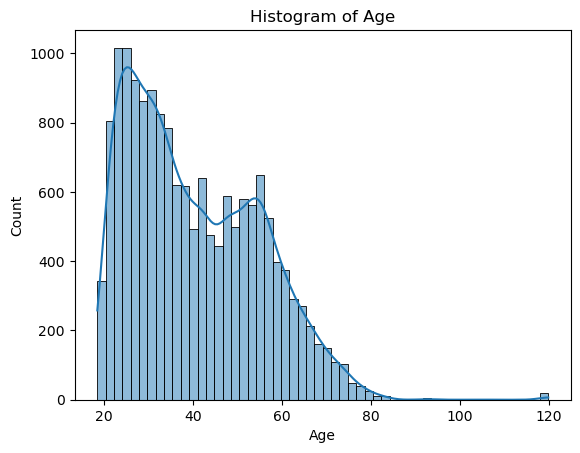

In [12]:
sns.histplot(data=df, x="age", kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, '# of Purchases')

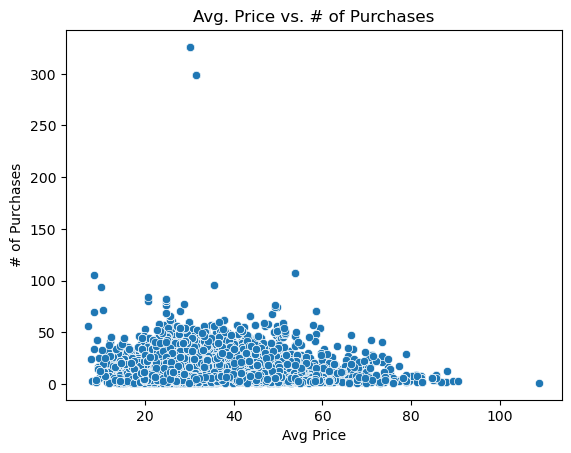

In [13]:
sns.scatterplot(data=df, y="n_purchase", x="avg_price")
plt.title("Avg. Price vs. # of Purchases")
plt.xlabel("Avg Price")
plt.ylabel("# of Purchases")

Text(0, 0.5, 'Avg. Price')

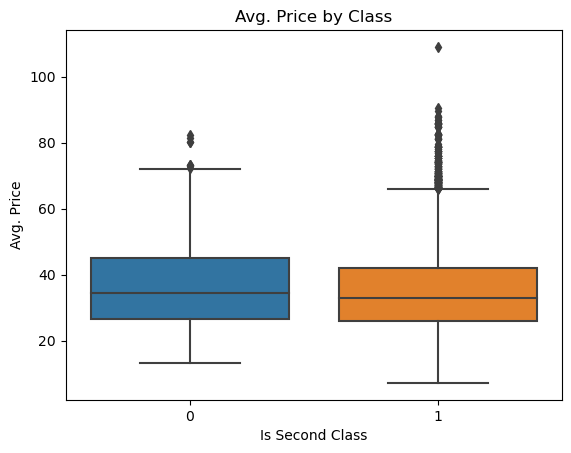

In [14]:
sns.boxplot(data=df, x="is_second_class", y="avg_price")
plt.title("Avg. Price by Class")
plt.xlabel("Is Second Class")
plt.ylabel("Avg. Price")

Text(0, 0.5, 'Count')

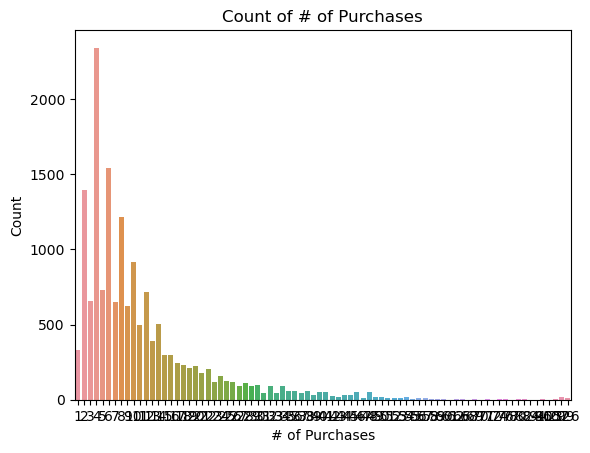

In [15]:
sns.countplot(data=df, x="n_purchase")
plt.title("Count of # of Purchases")
plt.xlabel("# of Purchases")
plt.ylabel("Count")

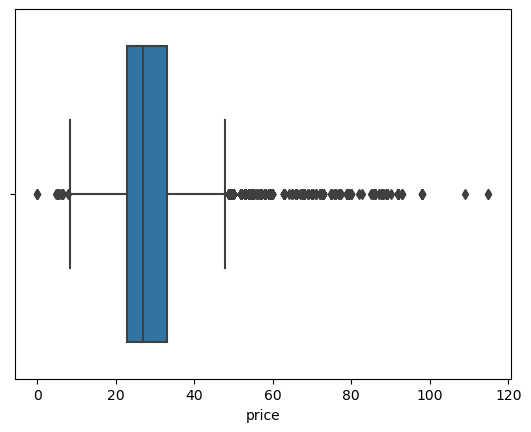

In [16]:
# create a boxplot of the 'success' column
sns.boxplot(x=df['price'])

# display the plot
plt.show()

Understanding the target or dependent variable

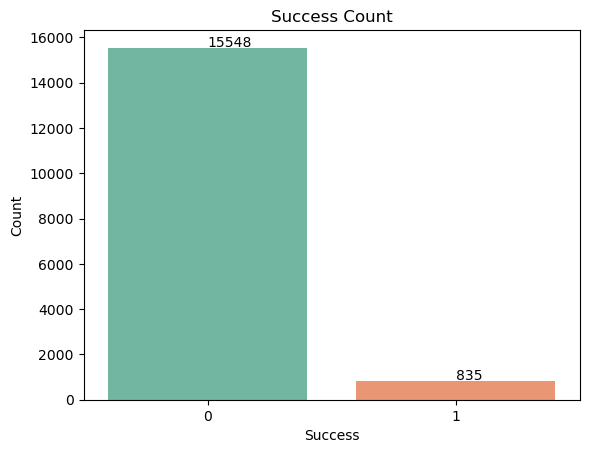

In [17]:
# Visualize distribution of target variable
# Set color palette
sns.set_palette("Set2")

# Create count plot
sns.countplot(x='success', data=df)

# Set plot title and labels
plt.title("Success Count")
plt.xlabel("Success")
plt.ylabel("Count")

# Add labels to bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()+50))

In [18]:
count_no_upgrade = len(df[df['success']==False])
count_upgrade = len(df[df['success']==True])
pct_of_no_upgrade = count_no_upgrade / (count_upgrade + count_no_upgrade) * 100
print("% of customer that did not upgrade class is", pct_of_no_upgrade)
pct_of_upgrade = count_upgrade / (count_upgrade + count_no_upgrade) * 100
print("% of customer that did upgrade class is", pct_of_upgrade)


% of customer that did not upgrade class is 94.90325337239823
% of customer that did upgrade class is 5.0967466276017825


From the given information, we can assume that the customers were given an option to upgrade their class, and only a small percentage (5.1%) chose to do so. The large majority of customers (94.9%) did not upgrade their class.

So here we would be using Imbalance class technique to hanlde this.

Text(0, 0.5, 'Count')

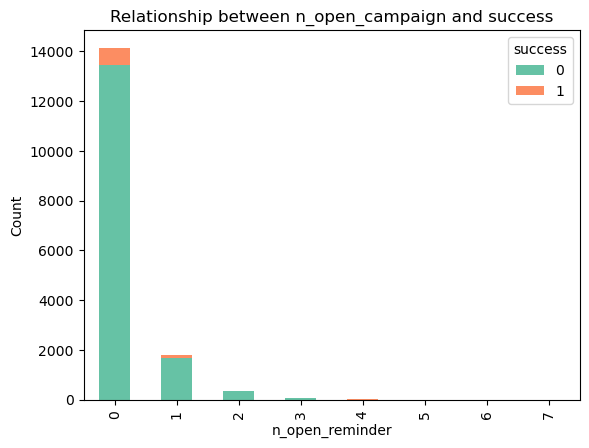

In [19]:
# Group the data by the values of 'n_open_campaign' and 'success'
grouped = df.groupby(['n_open_reminder', 'success']).size().unstack()

# Create a bar plot
grouped.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Relationship between n_open_campaign and success')
plt.xlabel('n_open_reminder')
plt.ylabel('Count')

In [20]:
opens_counts = df.groupby(["success", pd.cut(df["n_open_reminder"], [-1, 0, 3, np.inf], labels=["0", "1-3", "4+"])])["success"].count().unstack()
opens_props = opens_counts.apply(lambda row: row / row.sum(), axis=1)

print(opens_props)


n_open_reminder    0  1-3   4+
success                       
0               0.86 0.13 0.00
1               0.84 0.15 0.01


<AxesSubplot: >

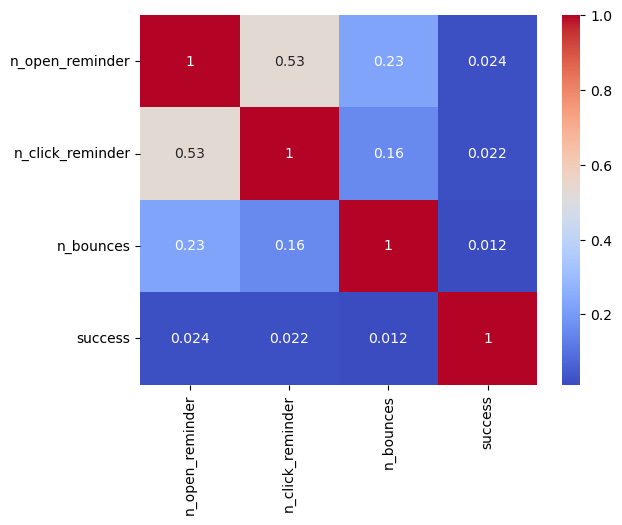

In [21]:
corr_matrix = df[["n_open_reminder", "n_click_reminder", "n_bounces", "success"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [22]:
# Calculate percentage of campaign emails opened
campaign_open_rate = (df['n_open_upgrade'].sum() / df['n_sent_upgrade'].sum()) * 100
print('Campaign email open rate:', campaign_open_rate)

# Calculate percentage of reminder emails opened
discount_open_rate = (df['n_open_discount'].sum() / df['n_sent_discount'].sum()) * 100
print('Discount email open rate:', discount_open_rate)

Campaign email open rate: 57.538403186042096
Discount email open rate: 45.978647686832744


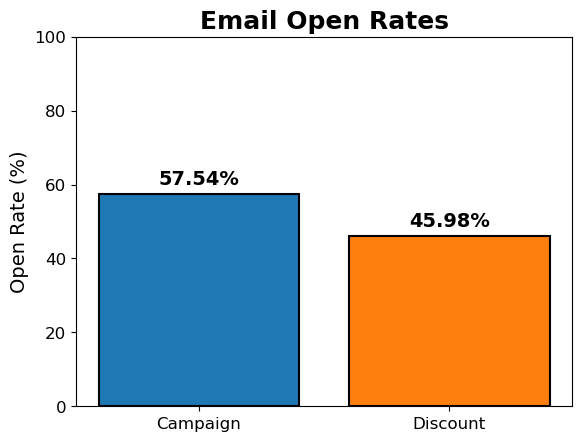

In [23]:
# Create a bar chart of the campaign open rate and reminder open rate
open_rates = [campaign_open_rate, discount_open_rate]
labels = ['Campaign', 'Discount']
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots()
ax.bar(labels, open_rates, color=colors, edgecolor='black', linewidth=1.5)
ax.set_title('Email Open Rates', fontsize=18, fontweight='bold')
ax.set_ylabel('Open Rate (%)', fontsize=14)
ax.set_ylim((0, 100))
ax.tick_params(axis='both', labelsize=12)

for i, rate in enumerate(open_rates):
    ax.text(i, rate + 1.5, f"{rate:.2f}%", ha='center', va='bottom', fontsize=14, fontweight='bold')


In [24]:
# Filter the dataset to only include rows where the email was opened and the upgrade was successful
campaign_success = df[(df['n_open_upgrade'] > 0) & (df['success'] == True)]
discount_success = df[(df['n_open_discount'] > 0) & (df['success'] == True)]

# Get the count of successful upgrades for each email type
campaign_count = len(campaign_success)
discount_count = len(discount_success)

# Print the results
print(f"Number of successful upgrades from campaign emails: {campaign_count}")
print(f"Number of successful upgrades from discount_count emails: {discount_count}")

Number of successful upgrades from campaign emails: 114
Number of successful upgrades from discount_count emails: 552


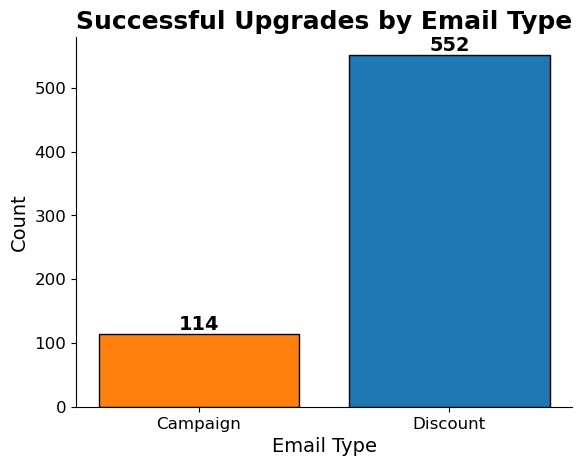

In [25]:
labels = ['Campaign', 'Discount']
counts = [campaign_count, discount_count]

fig, ax = plt.subplots()
ax.bar(labels, counts, color=['#ff7f0e', '#1f77b4'], edgecolor='black')
ax.set_title('Successful Upgrades by Email Type', fontsize=18, fontweight='bold')
ax.set_xlabel('Email Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)

for i, count in enumerate(counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold')

Multicollinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df.drop('success', axis=1)
y = df['success']
X_const = add_constant(X)

vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X.shape[1])], 
                index = X.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
upgrade_price            148.51
age                        2.30
n_purchase                 1.11
discount_purchase          6.85
n_reward                   3.40
n_first_class              1.51
n_second_class             1.56
n_third_class              4.14
n_fourth_class             1.34
avg_npassengers            1.09
avg_price                  2.00
avg_distance               2.82
since_last_purchase        4.95
n_sent_reminder            1.19
n_open_reminder            3.24
n_click_reminder           3.48
n_sent_upgrade             1.46
n_open_upgrade             4.01
n_click_upgrade            2.86
n_sent_discount            1.21
n_open_discount            1.81
n_click_discount           2.15
price                      1.46
days_2_trip                2.14
is_second_class            1.30
distance                   1.20
n_sessions                 5.60
n_bounces                 19.04
n_hits                     9.04
total_session_duration    15.55
total_revenu

In [27]:
df = df.drop(['total_session_duration','n_bounces','total_revenue'], axis=1) 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df.drop('success', axis=1)
y = df['success']
X_const = add_constant(X)

vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X.shape[1])], 
                index = X.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
upgrade_price         147.51
age                     2.30
n_purchase              1.09
discount_purchase       4.39
n_reward                3.36
n_first_class           1.51
n_second_class          1.52
n_third_class           4.09
n_fourth_class          1.33
avg_npassengers         1.09
avg_price               1.99
avg_distance            2.82
since_last_purchase     4.88
n_sent_reminder         1.19
n_open_reminder         3.23
n_click_reminder        3.46
n_sent_upgrade          1.45
n_open_upgrade          3.67
n_click_upgrade         2.86
n_sent_discount         1.21
n_open_discount         1.80
n_click_discount        2.15
price                   1.46
days_2_trip             2.13
is_second_class         1.30
distance                1.20
n_sessions              5.57
n_hits                  3.24
conversions            10.96
n_search                6.59
n_path                  3.73
dtype: float64


Imbalance Classification

In [29]:
from imblearn.under_sampling import RandomUnderSampler
# fit predictor and target variable
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

Models

Decision Tree

Accuracy score: 0.782435129740519
F1 score: 0.8014571948998178
ROCAUC score: 0.7834693357133751
Precision score: 0.7308970099667774
Recall score: 0.8870967741935484


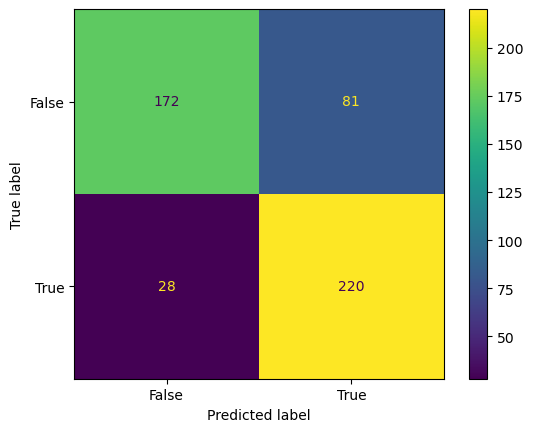

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Evaluating the model accuracy
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

[Text(0.2977135699728261, 0.9761904761904762, 'x[30] <= 0.5\ngini = 0.5\nsamples = 1169\nvalue = [582, 587]'),
 Text(0.05366847826086957, 0.9285714285714286, 'x[10] <= 28.633\ngini = 0.352\nsamples = 206\nvalue = [159, 47]'),
 Text(0.03260869565217391, 0.8809523809523809, 'x[20] <= 9.0\ngini = 0.089\nsamples = 86\nvalue = [82, 4]'),
 Text(0.02717391304347826, 0.8333333333333334, 'x[5] <= 4.0\ngini = 0.068\nsamples = 85\nvalue = [82, 3]'),
 Text(0.016304347826086956, 0.7857142857142857, 'x[1] <= 22.552\ngini = 0.047\nsamples = 83\nvalue = [81, 2]'),
 Text(0.010869565217391304, 0.7380952380952381, 'x[1] <= 22.438\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.005434782608695652, 0.6904761904761905, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.016304347826086956, 0.6904761904761905, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.021739130434782608, 0.7380952380952381, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.03804347826086957, 0.7857142857142857, 'x[21]

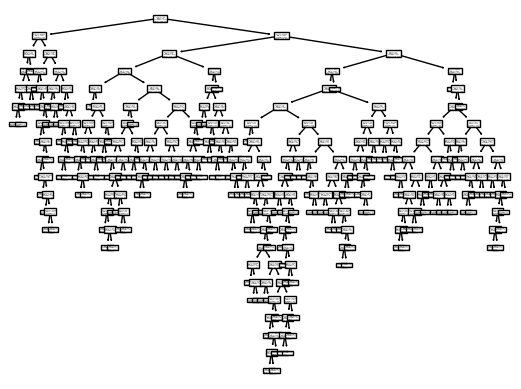

In [31]:
tree.plot_tree(clf)

[Text(0.35161042944785276, 0.9782608695652174, 'x[30] <= 0.5\nentropy = 1.0\nsamples = 1169\nvalue = [582, 587]'),
 Text(0.06850715746421268, 0.9347826086956522, 'x[10] <= 28.633\nentropy = 0.775\nsamples = 206\nvalue = [159, 47]'),
 Text(0.0408997955010225, 0.8913043478260869, 'x[1] <= 26.615\nentropy = 0.271\nsamples = 86\nvalue = [82, 4]'),
 Text(0.032719836400818, 0.8478260869565217, 'x[3] <= 1.5\nentropy = 0.667\nsamples = 23\nvalue = [19, 4]'),
 Text(0.024539877300613498, 0.8043478260869565, 'x[19] <= 6.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.016359918200409, 0.7608695652173914, 'x[22] <= 14.4\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.0081799591002045, 0.717391304347826, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.024539877300613498, 0.717391304347826, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.032719836400818, 0.7608695652173914, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0408997955010225, 0.8043478260869565, 

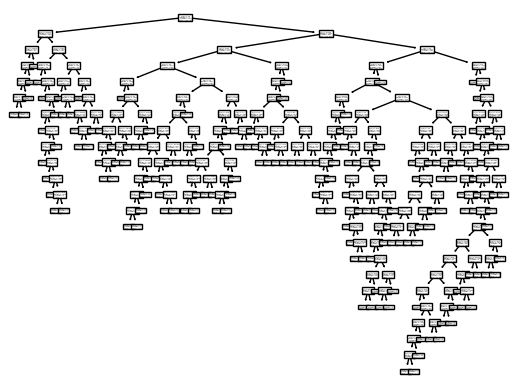

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

Decision tree regressor

In [33]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1.

[Text(0.2977135699728261, 0.9761904761904762, 'x[30] <= 0.5\nsquared_error = 0.25\nsamples = 1169\nvalue = 0.502'),
 Text(0.05366847826086957, 0.9285714285714286, 'x[10] <= 28.633\nsquared_error = 0.176\nsamples = 206\nvalue = 0.228'),
 Text(0.03260869565217391, 0.8809523809523809, 'x[20] <= 9.0\nsquared_error = 0.044\nsamples = 86\nvalue = 0.047'),
 Text(0.02717391304347826, 0.8333333333333334, 'x[5] <= 4.0\nsquared_error = 0.034\nsamples = 85\nvalue = 0.035'),
 Text(0.016304347826086956, 0.7857142857142857, 'x[1] <= 22.552\nsquared_error = 0.024\nsamples = 83\nvalue = 0.024'),
 Text(0.010869565217391304, 0.7380952380952381, 'x[1] <= 22.438\nsquared_error = 0.139\nsamples = 12\nvalue = 0.167'),
 Text(0.005434782608695652, 0.6904761904761905, 'squared_error = 0.0\nsamples = 10\nvalue = 0.0'),
 Text(0.016304347826086956, 0.6904761904761905, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.021739130434782608, 0.7380952380952381, 'squared_error = 0.0\nsamples = 71\nvalue = 0.0'),

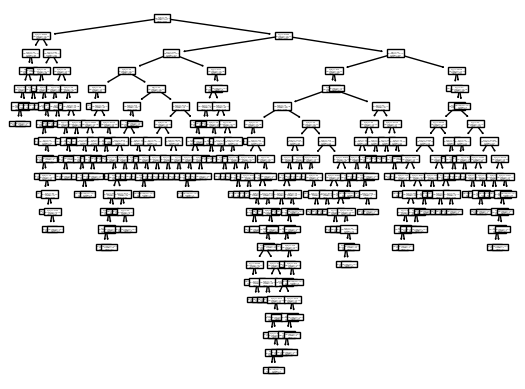

In [34]:
tree.plot_tree(clf)

In [35]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[29] <= 0.5\nsquared_error = 0.25\nsamples = 1169\nvalue = 0.502'),
 Text(0.25, 0.625, 'x[10] <= 28.633\nsquared_error = 0.176\nsamples = 206\nvalue = 0.228'),
 Text(0.125, 0.375, 'x[20] <= 9.0\nsquared_error = 0.044\nsamples = 86\nvalue = 0.047'),
 Text(0.0625, 0.125, 'squared_error = 0.034\nsamples = 85\nvalue = 0.035'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.375, 0.375, 'x[9] <= 1.481\nsquared_error = 0.23\nsamples = 120\nvalue = 0.358'),
 Text(0.3125, 0.125, 'squared_error = 0.163\nsamples = 68\nvalue = 0.206'),
 Text(0.4375, 0.125, 'squared_error = 0.247\nsamples = 52\nvalue = 0.558'),
 Text(0.75, 0.625, 'x[1] <= 37.059\nsquared_error = 0.246\nsamples = 963\nvalue = 0.561'),
 Text(0.625, 0.375, 'x[9] <= 1.931\nsquared_error = 0.24\nsamples = 371\nvalue = 0.399'),
 Text(0.5625, 0.125, 'squared_error = 0.217\nsamples = 269\nvalue = 0.32'),
 Text(0.6875, 0.125, 'squared_error = 0.238\nsamples = 102\nvalue = 0.608'),
 Text(0.

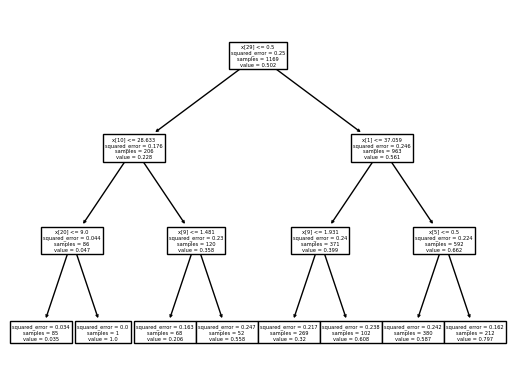

In [36]:
tree.plot_tree(clf)

Gaussian naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,

Accuracy score: 0.782435129740519
F1 score: 0.8014571948998178
ROCAUC score: 0.7834693357133751
Precision score: 0.7308970099667774
Recall score: 0.8870967741935484


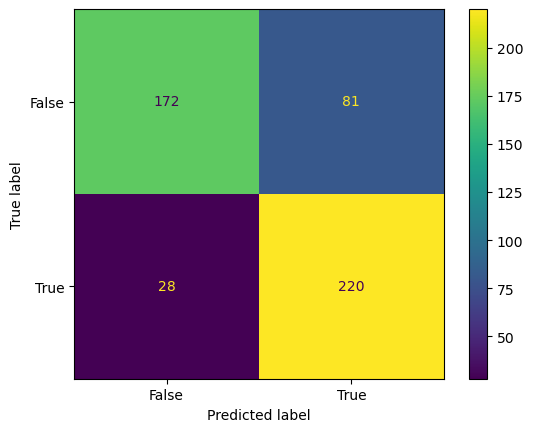

In [39]:
# Evaluating the model accuracy
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

Bagging

In [40]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
max_features = 3

kfold = model_selection.KFold(n_splits=10)
rf = DecisionTreeClassifier(max_features=max_features)

model = BaggingClassifier(base_estimator=rf, n_estimators=100, random_state=2020)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
results.mean()

/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was ren

0.8263188918361332

Accuracy score: 0.6087824351297405
F1 score: 0.5983606557377049
ROCAUC score: 0.6085840877215352
Precision score: 0.6083333333333333
Recall score: 0.5887096774193549


/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


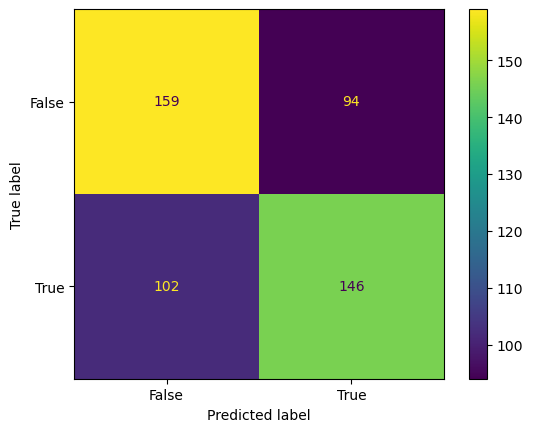

In [41]:
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


Random Forest

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


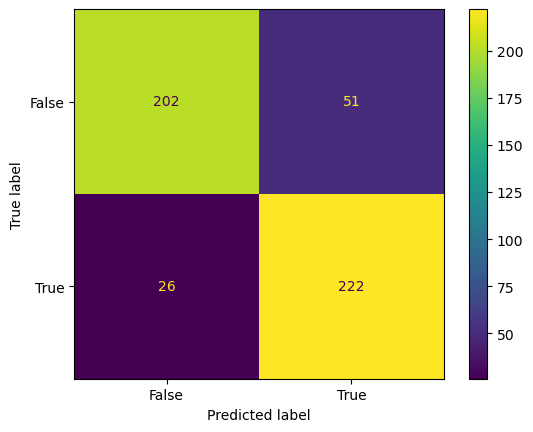

In [42]:
 # Importing required libraries
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf.predict(X_test)

# Evaluating the model accuracy
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


In [43]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


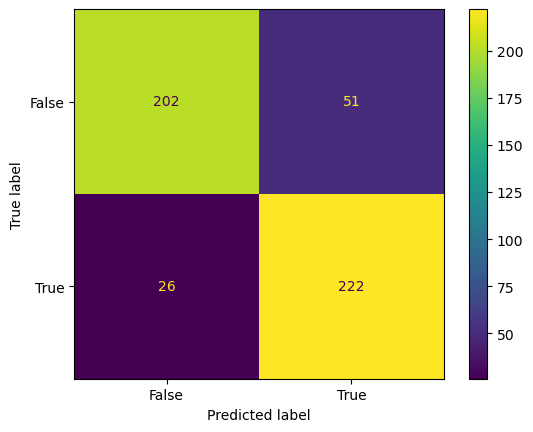

In [44]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


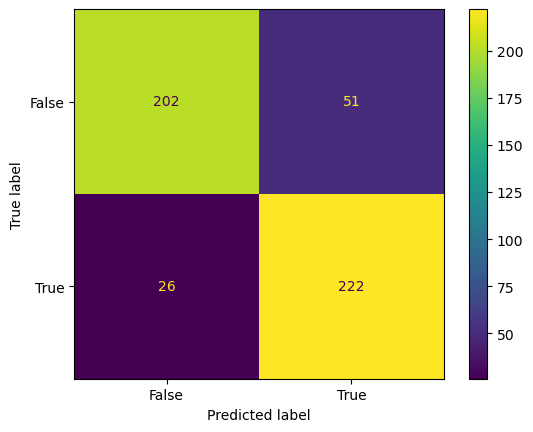

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

SVM

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


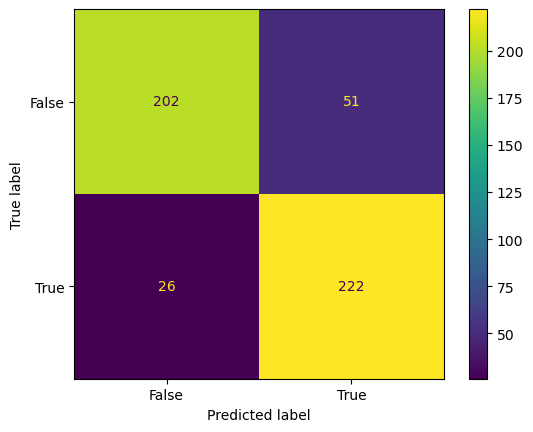

In [46]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


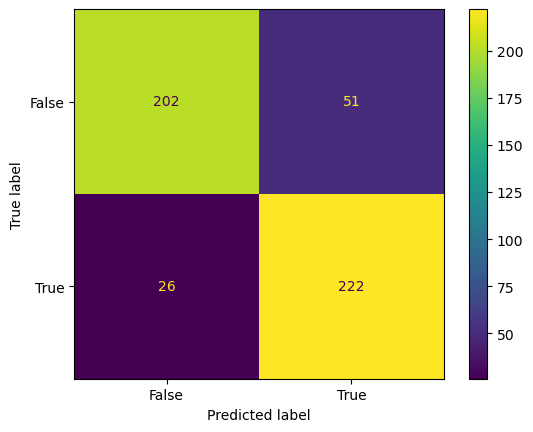

In [47]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


In [48]:
from sklearn.svm import NuSVC

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


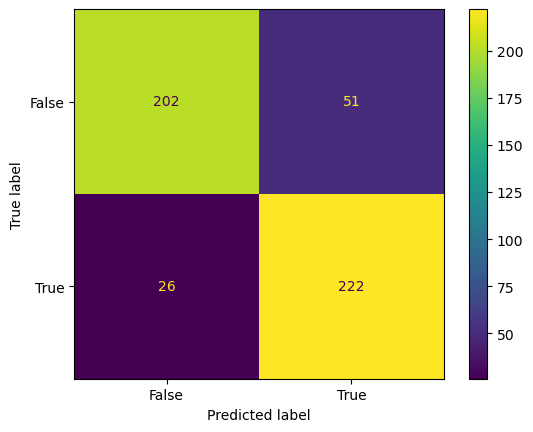

In [49]:
clf = make_pipeline(StandardScaler(), NuSVC())
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

In [50]:
from sklearn.svm import OneClassSVM

Accuracy score: 0.846307385229541
F1 score: 0.8522072936660268
ROCAUC score: 0.8467901313272982
Precision score: 0.8131868131868132
Recall score: 0.8951612903225806


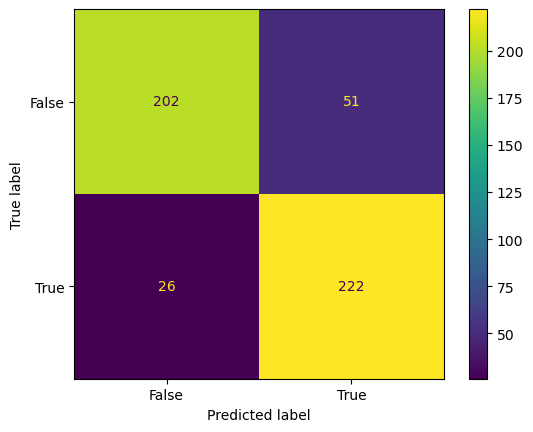

In [51]:
clf = make_pipeline(StandardScaler(), OneClassSVM(gamma='auto'))
clf.fit(X_train, y_train)
clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       253
           1       0.66      0.61      0.63       248

    accuracy                           0.65       501
   macro avg       0.65      0.65      0.65       501
weighted avg       0.65      0.65      0.65       501

Accuracy score: 0.6487025948103793
F1 score: 0.6317991631799164
ROCAUC score: 0.648309001657529
Precision score: 0.6565217391304348
Recall score: 0.6088709677419355


/Users/nirant/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


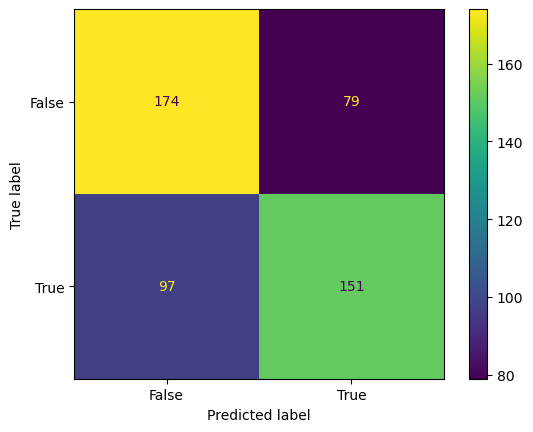

In [53]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


The Conclusion:
The proposed project aims to optimize marketing emails to target customers who purchase a class upgrade after receiving a marketing email, after applying multiple machine learning models to optimize the mailing strategy, so the company can target the customer to increase the flight ticket class upgrade conversion rate.

The key performance indicator for the model we have implemented are Confusion matrix, ROC, F1 score, Precision and Recall. As aim is to maximize the number of users who take a specific action after opening the email, we would be using combination of above mentioned metrics example accuracy and precision and recall.

Based on the evaluation metrics provided, it seems like the Random Forest, AdaBoostClassifier, and SVM models are all performing similarly with the same accuracy, F1 score, ROCAUC score, Precision, and Recall score. This means that they are all predicting the target variable with similar accuracy and performance

However, it's important to note that the decision tree model has a lower accuracy, F1 score, and ROCAUC score compared to the other models. This means that the decision tree model may not be the best choice for this particular problem.

Hence, Random Forest model as it has the highest accuracy score of the three and generally performs well in a variety of classification tasks. 